In [1]:
import pandas as pd
import numpy as np

In [4]:
data = pd.read_csv('./data/Advertising.csv', index_col = 0)

In [5]:
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [7]:
import seaborn as sns

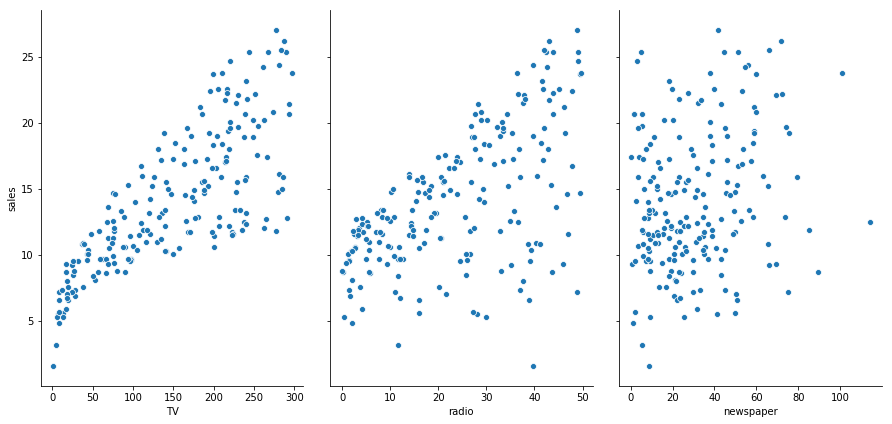

In [10]:
sns.pairplot(data, x_vars = ['TV', 'radio', 'newspaper'], y_vars = 'sales', height=6, aspect = 0.7)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


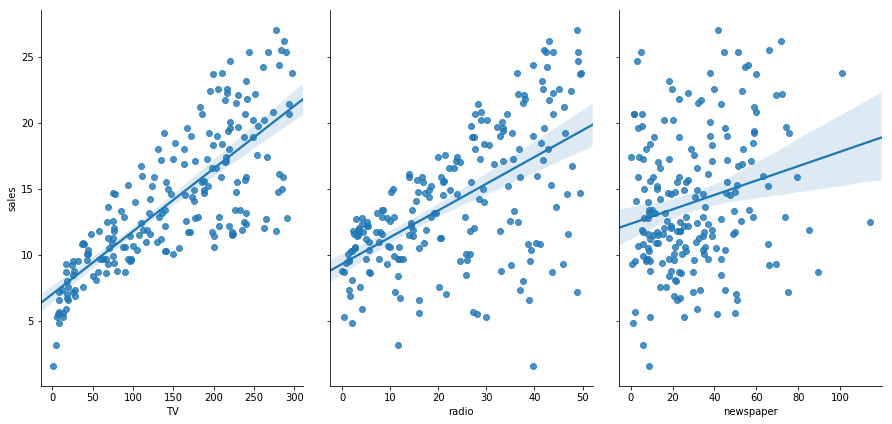

In [11]:
sns.pairplot(data, x_vars = ['TV', 'radio', 'newspaper'], y_vars = 'sales', height=6, aspect = 0.7, kind = 'reg')

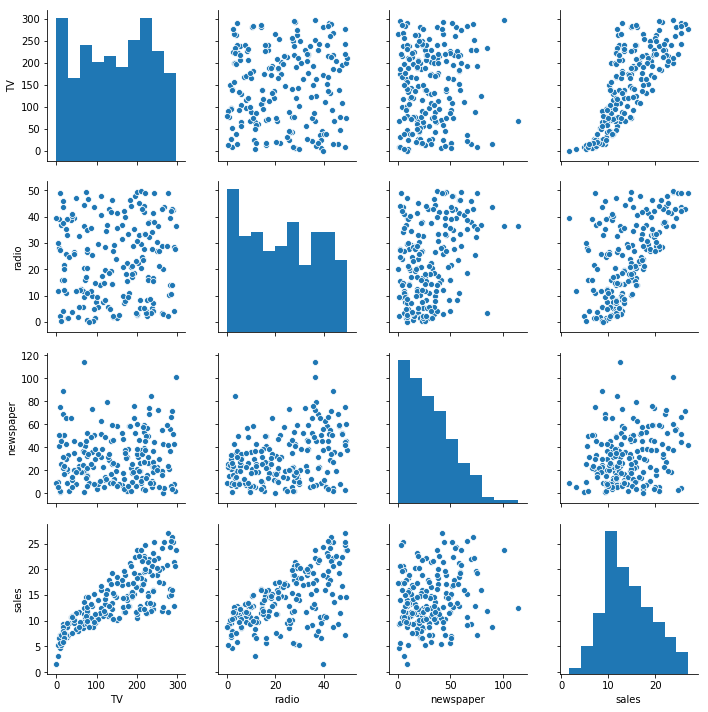

In [12]:
sns.pairplot(data)

In [13]:
data.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


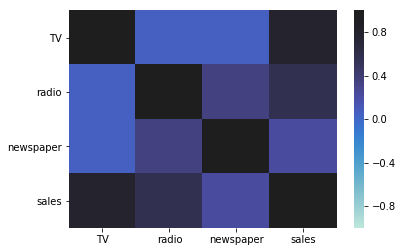

In [21]:
sns.heatmap(data.corr(), vmin = -1, vmax=1, center = 1)

In [22]:
feature_columns = ['TV']
X = data[feature_columns]
y = data.sales

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
linreg = LinearRegression()

In [26]:
linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [27]:
print(linreg.intercept_)
print(linreg.coef_)

7.032593549127693
[0.04753664]


In [31]:
linreg.predict(45)

array([9.17174237])

In [32]:
linreg.intercept_ + linreg.coef_*45

array([9.17174237])

In [33]:
y_pred = linreg.predict(X)

In [44]:
from sklearn.metrics import r2_score
r2_score(y,y_pred)

0.611875050850071

In [45]:
feature_columns = ['TV', 'radio', 'newspaper']
X = data[feature_columns]
y = data.sales

In [46]:
linreg = LinearRegression()
linreg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [47]:
print(linreg.intercept_)
print(linreg.coef_)

2.9388893694594067
[ 0.04576465  0.18853002 -0.00103749]


In [49]:
dict(zip(feature_columns, linreg.coef_))

{'TV': 0.04576464545539761,
 'radio': 0.18853001691820462,
 'newspaper': -0.0010374930424762972}

In [51]:
import statsmodels.formula.api as smf

In [60]:
linreg = smf.ols(formula = 'sales ~ TV + radio + newspaper', data=data).fit()

In [63]:
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Wed, 11 Dec 2019   Prob (F-statistic):           1.58e-96
Time:                        18:08:50   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
feature_columns = ['TV', 'radio']

In [67]:
linreg = LinearRegression()

In [70]:
from sklearn.model_selection import cross_val_score
X = data[feature_columns]
scores = cross_val_score(linreg, X, y, cv=5, scoring='neg_mean_squared_error').mean()

In [71]:
scores

-3.011640691152608

In [72]:
feature_columns = ['TV']
linreg = LinearRegression()
X = data[feature_columns]
scores = cross_val_score(linreg, X, y, cv=5, scoring='neg_mean_squared_error').mean()
scores

-10.794506106524935